In [42]:
import pandas as pd

eicu_before_process = pd.read_csv("../data/eicu_harmonized_after_48.csv")

selected_hospitals = [167, 420, 199, 458, 252, 165, 148, 281, 449, 283]
selected_eicu = eicu_before_process[eicu_before_process['hospitalid'].isin(selected_hospitals)]

zero_columns = selected_eicu.columns[(selected_eicu == 0).all()].tolist()

print(len(selected_eicu.columns[(selected_eicu == 0).all()].tolist()))

eicu = eicu_before_process.drop(columns=zero_columns)
eicu.head()

55


,patientunitstayid,hospitalid,death,ventilation,sepsis,acetamin,compazine,ferrous,lidocaine,milk of magnesia,...,sex_is_male,sex_is_female,< 30,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79,80 - 89,> 89
0,141168.0,59.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,141178.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,141179.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,141194.0,73.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,141196.0,67.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Drug: 5 - 187

In [48]:
eicu.columns[5:187]

Index(['acetamin', 'compazine', 'ferrous', 'lidocaine', 'milk of magnesia',
       'nystatin', 'prochlorperazine', 'tamsulosin', 'advair diskus',
       'bisacodyl',
       ...
       'levofloxacin', 'midazolam', 'succinylcholine', 'clopidogrel',
       'fentanyl', 'ibuprofen', 'levothyroxine', 'midodrine', 'norvasc',
       'tacrolimus'],
      dtype='object', length=182)

BMI: 187 - 191

In [54]:
eicu.columns[187:191]

Index(['bmi_underweight', 'bmi_normal', 'bmi_overweight', 'bmi_obesity'], dtype='object')

Race: 191 - 196

In [59]:
eicu.columns[191:196]

Index(['race_african', 'race_hispanic', 'race_caucasion', 'race_asian',
       'race_native'],
      dtype='object')

Sex: 196 - 198

In [61]:
eicu.columns[196:198]

Index(['sex_is_male', 'sex_is_female'], dtype='object')

Age: 198 - 206

In [64]:
eicu.columns[198:206]

Index(['< 30', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79',
       '80 - 89', '> 89'],
      dtype='object')

In [65]:
eicu.to_csv("../data/eicu_harmonized_updated.csv", index=False)

# Load Data

In [67]:
import pandas as pd

eicu = pd.read_csv("../data/eicu_harmonized_updated.csv")
print(eicu.shape)
print("Total hospitals: ", len(eicu.hospitalid.unique()))
print("Total drugs: ", len(eicu.columns[5:187]))
print("Total features: ", len(eicu.columns[5:]))
eicu.head()

(138546, 206)
Total hospitals:  208
Total drugs:  182
Total features:  201


,patientunitstayid,hospitalid,death,ventilation,sepsis,acetamin,compazine,ferrous,lidocaine,milk of magnesia,...,sex_is_male,sex_is_female,< 30,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79,80 - 89,> 89
0,141168.0,59.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,141178.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,141179.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,141194.0,73.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,141196.0,67.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [68]:
hospital_counts = eicu.groupby('hospitalid').size().reset_index(name='count')
count = hospital_counts.sort_values(by='count', ascending=False)
selected_hospitals = count[count["count"] > 2000]
filtered_hospital_ids = []
for hospitalid in selected_hospitals.hospitalid:
    filtered = eicu[eicu["hospitalid"] == hospitalid]
    death_sum = filtered["death"].sum()
    ventilator_sum = filtered["ventilation"].sum()
    sepsis_sum = filtered["sepsis"].sum()
    if death_sum / len(filtered) >= 0.03 and ventilator_sum / len(filtered) >= 0.03 and sepsis_sum / len(filtered) >= 0.03:
        filtered_hospital_ids.append(hospitalid)

print([int(x) for x in filtered_hospital_ids])
print(len(filtered_hospital_ids))

[420, 199, 188, 458, 252]
5


# Filter Data

In [69]:
selected_hospitals = [167, 420, 199, 458, 252, 165, 148, 281, 449, 283]
selected_eicu = eicu[eicu['hospitalid'].isin(selected_hospitals)]
selected_eicu.shape

(24390, 206)

# Visualization

In [70]:
def calculate_death_alive_count(label):
    death_patients_count, alive_patients_count = [], []
    for hospital in selected_hospitals:
        hospital_df = eicu[eicu["hospitalid"] == hospital]
        alive_patients_count.append(len(hospital_df[hospital_df[label] == 0]))
        death_patients_count.append(len(hospital_df[hospital_df[label] == 1]))
    return death_patients_count, alive_patients_count

## Ventilation

Use ventilation patients:  [458, 1324, 552, 603, 503, 180, 247, 327, 538, 244]
No ventilation patients:  [4357, 2168, 2320, 1958, 1711, 2167, 1847, 1314, 541, 1031]


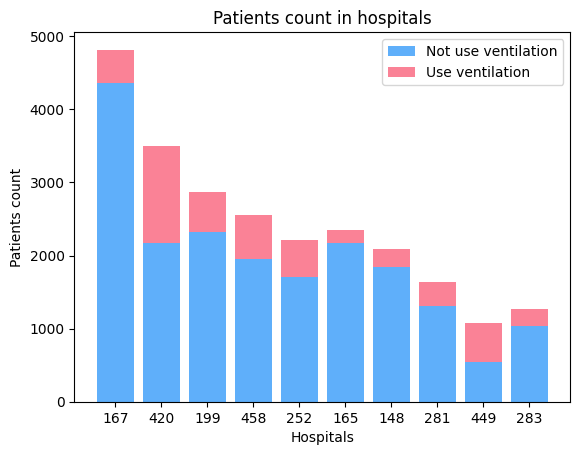

In [71]:
import matplotlib.pyplot as plt

use_ventilation, no_ventilation = calculate_death_alive_count("ventilation")
print("Use ventilation patients: ", use_ventilation)
print("No ventilation patients: ", no_ventilation)

selected_hospital_labels = [str(int(x)) for x in selected_hospitals]

# plt.figure(figsize=(10,6))
plt.title("Patients count in hospitals")
plt.bar(selected_hospital_labels, no_ventilation, label='Not use ventilation', color="#5faffa")
plt.bar(selected_hospital_labels, use_ventilation, bottom=no_ventilation, label='Use ventilation', color="#fa8296")
plt.legend()
plt.xlabel("Hospitals")
plt.ylabel("Patients count")
plt.show()

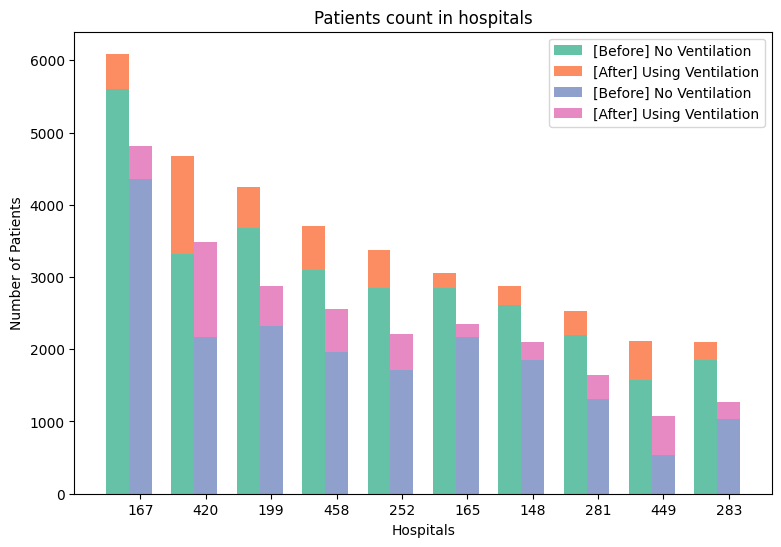

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Data
hospitals = ['167', '420', '199', '458', '252', '165', '148', '281', '449', '283']

m1_vent = [486, 1354, 560, 604, 516, 200, 264, 328, 539, 246]
m1_no_vent = [5606, 3325, 3680, 3097, 2855, 2853, 2617, 2203, 1571, 1851]

m2_vent = [458, 1324, 552, 603, 503, 180, 247, 327, 538, 244]
m2_no_vent = [4357, 2168, 2320, 1958, 1711, 2167, 1847, 1314, 541, 1031]

# Colors specified in RGB format
colors = [(102/255, 194/255, 166/255), (252/255, 141/255, 98/255), (142/255, 160/255, 203/255), (231/255, 138/255, 195/255)]

# Create grouped bar plot
barWidth = 0.35
r1 = np.arange(len(hospitals))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(9,6))
plt.title("Patients count in hospitals")

# For Measurement 1
plt.bar(r1, m1_no_vent, color=colors[0], width=barWidth, label='[Before] No Ventilation')
plt.bar(r1, m1_vent, bottom=m1_no_vent, color=colors[1], width=barWidth, label='[After] Using Ventilation')

# For Measurement 2
plt.bar(r2, m2_no_vent, color=colors[2], width=barWidth, label='[Before] No Ventilation')
plt.bar(r2, m2_vent, bottom=m2_no_vent, color=colors[3], width=barWidth, label='[After] Using Ventilation')

# Formatting
plt.xlabel('Hospitals')
plt.ylabel('Number of Patients')
plt.xticks([r + barWidth for r in range(len(hospitals))], hospitals)
plt.legend()

plt.show()


Has sepsis patients:  [206, 702, 142, 107, 230, 81, 129, 93, 68, 79]
No sepsis patients:  [4609, 2790, 2730, 2454, 1984, 2266, 1965, 1548, 1011, 1196]


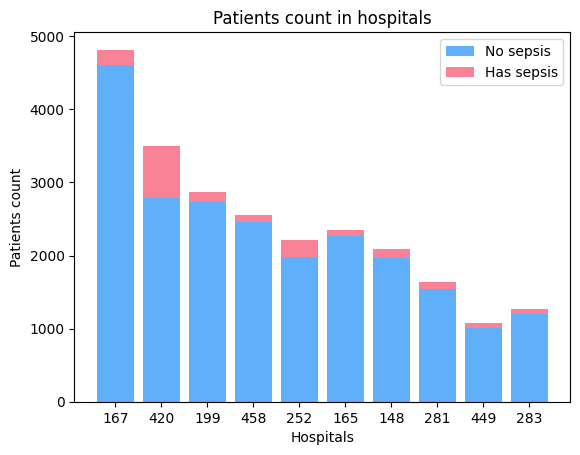

In [73]:
import matplotlib.pyplot as plt

has_sepsis, no_sepsis = calculate_death_alive_count("sepsis")
print("Has sepsis patients: ", has_sepsis)
print("No sepsis patients: ", no_sepsis)

selected_hospital_labels = [str(int(x)) for x in selected_hospitals]

# plt.figure(figsize=(10,6))
plt.title("Patients count in hospitals")
plt.bar(selected_hospital_labels, no_sepsis, label='No sepsis', color="#5faffa")
plt.bar(selected_hospital_labels, has_sepsis, bottom=no_sepsis, label='Has sepsis', color="#fa8296")
plt.legend()
plt.xlabel("Hospitals")
plt.ylabel("Patients count")
plt.show()

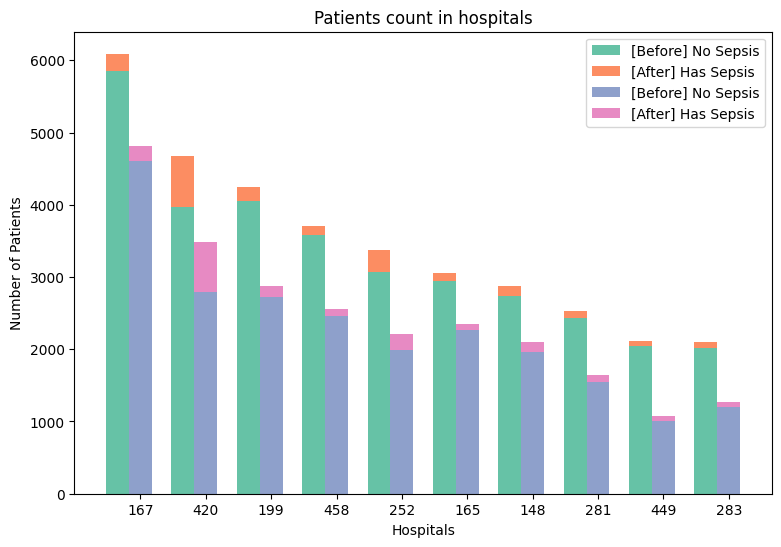

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Data
hospitals = ['167', '420', '199', '458', '252', '165', '148', '281', '449', '283']

m1_vent = [237, 715, 184, 123, 302, 104, 146, 101, 71, 84]
m1_no_vent = [5855, 3964, 4056, 3578, 3069, 2949, 2735, 2430, 2039, 2013]

m2_vent = [206, 702, 142, 107, 230, 81, 129, 93, 68, 79]
m2_no_vent = [4609, 2790, 2730, 2454, 1984, 2266, 1965, 1548, 1011, 1196]

# Colors specified in RGB format
colors = [(102/255, 194/255, 166/255), (252/255, 141/255, 98/255), (142/255, 160/255, 203/255), (231/255, 138/255, 195/255)]

# Create grouped bar plot
barWidth = 0.35
r1 = np.arange(len(hospitals))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(9,6))
plt.title("Patients count in hospitals")

# For Measurement 1
plt.bar(r1, m1_no_vent, color=colors[0], width=barWidth, label='[Before] No Sepsis')
plt.bar(r1, m1_vent, bottom=m1_no_vent, color=colors[1], width=barWidth, label='[After] Has Sepsis')

# For Measurement 2
plt.bar(r2, m2_no_vent, color=colors[2], width=barWidth, label='[Before] No Sepsis')
plt.bar(r2, m2_vent, bottom=m2_no_vent, color=colors[3], width=barWidth, label='[After] Has Sepsis')

# Formatting
plt.xlabel('Hospitals')
plt.ylabel('Number of Patients')
plt.xticks([r + barWidth for r in range(len(hospitals))], hospitals)
plt.legend()

plt.show()


Death patients:  [137, 309, 120, 200, 141, 61, 47, 65, 69, 46]
Alive patients:  [4678, 3183, 2752, 2361, 2073, 2286, 2047, 1576, 1010, 1229]


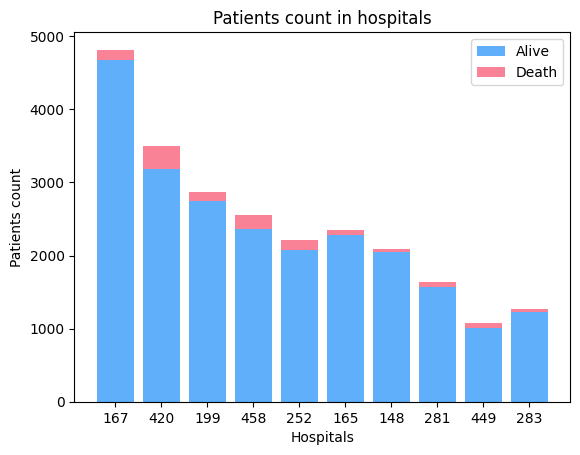

In [75]:
import matplotlib.pyplot as plt

death, alive = calculate_death_alive_count("death")
print("Death patients: ", death)
print("Alive patients: ", alive)

selected_hospital_labels = [str(int(x)) for x in selected_hospitals]

# plt.figure(figsize=(10,6))
plt.title("Patients count in hospitals")
plt.bar(selected_hospital_labels, alive, label='Alive', color="#5faffa")
plt.bar(selected_hospital_labels, death, bottom=alive, label='Death', color="#fa8296")
plt.legend()
plt.xlabel("Hospitals")
plt.ylabel("Patients count")
plt.show()

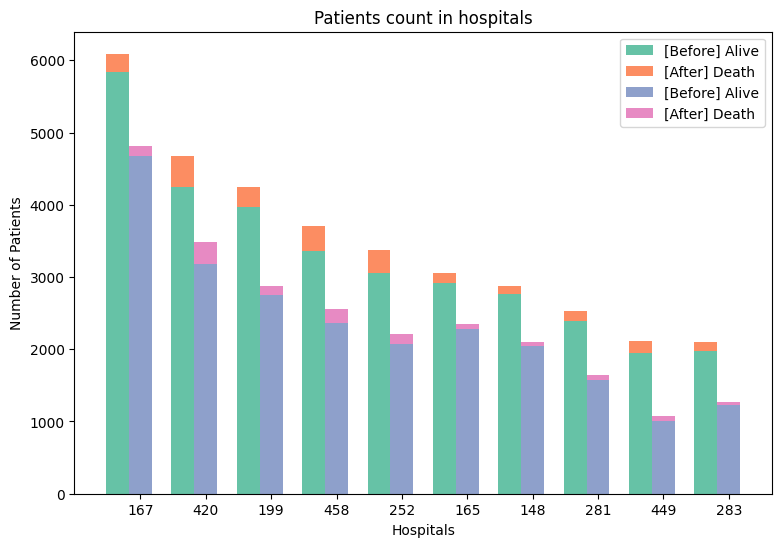

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Data
hospitals = ['167', '420', '199', '458', '252', '165', '148', '281', '449', '283']

m1_vent = [257, 438, 268, 335, 312, 135, 116, 134, 160, 126]
m1_no_vent = [5835, 4241, 3972, 3366, 3059, 2918, 2765, 2397, 1950, 1971]

m2_vent = [137, 309, 120, 200, 141, 61, 47, 65, 69, 46]
m2_no_vent = [4678, 3183, 2752, 2361, 2073, 2286, 2047, 1576, 1010, 1229]

# Colors specified in RGB format
colors = [(102/255, 194/255, 166/255), (252/255, 141/255, 98/255), (142/255, 160/255, 203/255), (231/255, 138/255, 195/255)]

# Create grouped bar plot
barWidth = 0.35
r1 = np.arange(len(hospitals))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(9,6))
plt.title("Patients count in hospitals")

# For Measurement 1
plt.bar(r1, m1_no_vent, color=colors[0], width=barWidth, label='[Before] Alive')
plt.bar(r1, m1_vent, bottom=m1_no_vent, color=colors[1], width=barWidth, label='[After] Death')

# For Measurement 2
plt.bar(r2, m2_no_vent, color=colors[2], width=barWidth, label='[Before] Alive')
plt.bar(r2, m2_vent, bottom=m2_no_vent, color=colors[3], width=barWidth, label='[After] Death')

# Formatting
plt.xlabel('Hospitals')
plt.ylabel('Number of Patients')
plt.xticks([r + barWidth for r in range(len(hospitals))], hospitals)
plt.legend()

plt.show()


# Covariate Shift Analysis

We have covariate shift problems in the drugs taken by patients

In [78]:
import numpy as np

selected_eicu = (eicu[eicu['hospitalid'].isin(selected_hospitals)]).to_numpy()
ids = selected_eicu[:, 1]
drugs = selected_eicu[:, 5:187]
all_features = selected_eicu[:, 5:]

print(ids)
print(drugs.shape)
print(all_features.shape)

[165. 165. 167. ... 458. 458. 458.]
(24390, 182)
(24390, 201)


In [79]:
import umap.umap_ as umap

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

def draw_umap(x, n_neighbors, min_dist, title):

    reducer = umap.UMAP(n_neighbors=n_neighbors, n_components=2, min_dist=min_dist,
                        random_state=np.random.RandomState(25),
                        transform_seed=np.random.RandomState(25))
    principal_components = reducer.fit_transform(x)
    print(principal_components.shape)

    final_np = np.hstack((principal_components, ids[:, None]))
    print(final_np.shape)

    plt.figure(figsize=(8, 6))

    palette = [
        '#ff3333',   # Red
        '#ff6633',   # Orange Red
        '#ffcc00',   # Gold Yellow
        '#6cf56c',   # Fresh Green
        '#008000',   # Dark Green
        '#00cccc',   # Dark Turquoise
        '#325bfa',   # Royal Blue
        '#6633cc',   # Blue Violet
        '#808080',   # Grey
        '#ff66ba'    # Deep Pink
    ]
    colors = sns.color_palette(palette, n_colors=10)
    legend_elements = []
    for id, hospital_id in enumerate(list(np.unique(final_np[:, 2]))):

        color = colors[id]

        print("id: {} hospital id: {}, color: {}".format(id, hospital_id, color))

        scatter_rows = final_np[np.where(final_np[:, 2] == hospital_id)]
        # scatter_rows = np.float32(scatter_rows[:, :2])

        plot = plt.scatter(scatter_rows[:, 0], scatter_rows[:, 1], label=hospital_id, color=color, alpha=0.15, s=1.2)
        legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=int(hospital_id))
        legend_elements.append(legend_element)

    plt.title(title)
    plt.legend(title="Hospital id", handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
    # plt.grid(True)
    plt.show()

    return final_np


(24390, 2)
(24390, 3)
id: 0 hospital id: 148.0, color: (1.0, 0.2, 0.2)
id: 1 hospital id: 165.0, color: (1.0, 0.4, 0.2)
id: 2 hospital id: 167.0, color: (1.0, 0.8, 0.0)
id: 3 hospital id: 199.0, color: (0.4235294117647059, 0.9607843137254902, 0.4235294117647059)
id: 4 hospital id: 252.0, color: (0.0, 0.5019607843137255, 0.0)
id: 5 hospital id: 281.0, color: (0.0, 0.8, 0.8)
id: 6 hospital id: 283.0, color: (0.19607843137254902, 0.3568627450980392, 0.9803921568627451)
id: 7 hospital id: 420.0, color: (0.4, 0.2, 0.8)
id: 8 hospital id: 449.0, color: (0.5019607843137255, 0.5019607843137255, 0.5019607843137255)
id: 9 hospital id: 458.0, color: (1.0, 0.4, 0.7294117647058823)


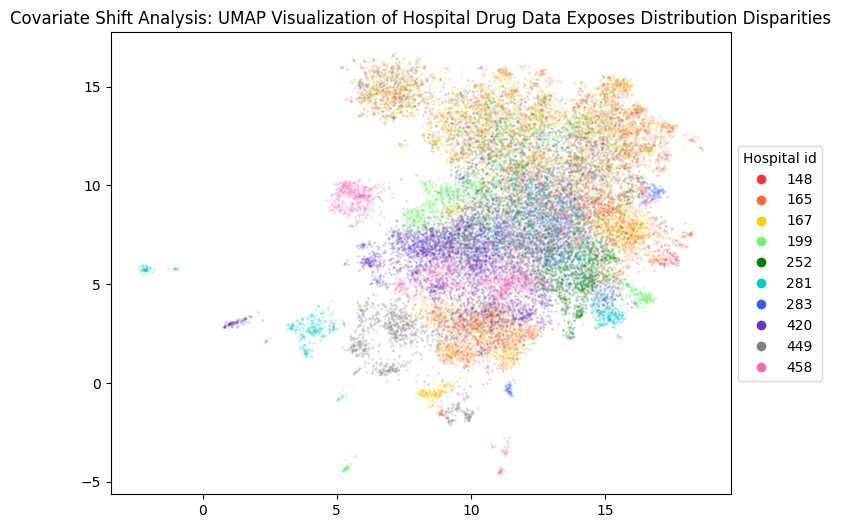

In [80]:
final_np = draw_umap(drugs, 5, 0.5, title="Covariate Shift Analysis: UMAP Visualization of Hospital Drug Data Exposes Distribution Disparities")

In [81]:
from sklearn.metrics.pairwise import pairwise_distances

unique_ids = np.unique(ids)

avg_distance_dict = np.zeros((len(unique_ids), len(unique_ids)))

for id in unique_ids:

    cluster1 = final_np[final_np[:,2] == id]
    cluster1 = cluster1[:,[0,1]]

    id_pos = np.where(unique_ids == id)[0][0]

    for neighbour_id in unique_ids:
        
        # if neighbour_id == id:
        #     continue

        # if str(int(id)) + " " + str(int(neighbour_id)) in avg_distance_dict:
        #     continue

        # if str(int(neighbour_id)) + " " + str(int(id)) in avg_distance_dict:
        #     continue
        if id == neighbour_id:
            avg_distances = 0.0
        else:
            cluster2 = final_np[final_np[:,2] == neighbour_id]
            cluster2 = cluster2[:,[0,1]]

            distance = pairwise_distances(cluster1, cluster2)
            distances = distance.reshape(-1)
            avg_distances = np.median(distances)
            avg_distances = avg_distances.item()

        neighbour_id_pos = np.where(unique_ids == neighbour_id)[0][0]
        avg_distance_dict[id_pos, neighbour_id_pos] = avg_distances

<Figure size 640x480 with 0 Axes>

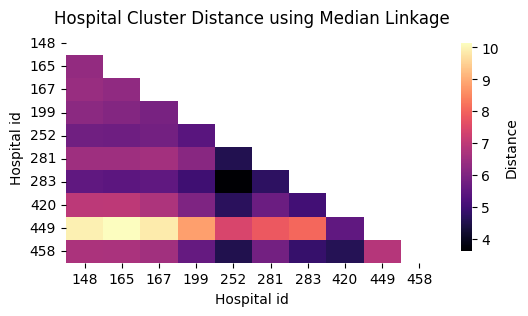

In [82]:
from matplotlib.colors import PowerNorm

plt.clf()
plt.figure(figsize=(6, 3))
plt.title("Hospital Cluster Distance using Median Linkage")

mask = np.triu(np.ones_like(avg_distance_dict))

ax = sns.heatmap(avg_distance_dict, mask=mask, cmap="magma", cbar_kws={'shrink': 0.9})
colorbar = ax.collections[0].colorbar
colorbar.set_label("Distance")
# colorbar.ax.tick_params(labelsize=6)
ax.set_yticklabels([str(int(id)) for id in unique_ids], rotation=0)
ax.set_xticklabels([str(int(id)) for id in unique_ids])
plt.xlabel("Hospital id")
plt.ylabel("Hospital id")
plt.show()
plt.close()

Percentage of drugs taken by patients in each hospital

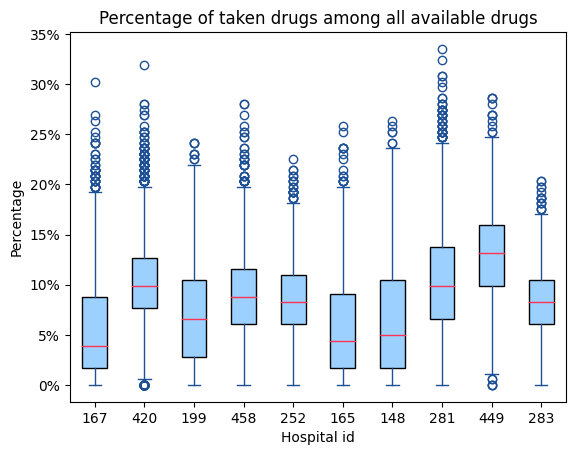

In [88]:
from matplotlib.ticker import FuncFormatter

drug_taken_data = []
for hospital_id in selected_hospitals:
    hospital_data = eicu[eicu['hospitalid'] == hospital_id]
    drugs = hospital_data.iloc[:, 5:187].to_numpy()
    drugs_taken = np.sum(drugs, axis=1)
    total_drugs = drugs.shape[1]
    drugs_taken_percent = drugs_taken / total_drugs
    drug_taken_data.append(drugs_taken_percent)

def to_percent(y, position):
    s = str(int(100 * y))
    if plt.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

fig, ax = plt.subplots()
bplot1 = ax.boxplot(drug_taken_data, patch_artist=True)
for patch in bplot1['boxes']:
    patch.set_facecolor("#9cd1ff")
for median in bplot1['medians']:
    median.set_color("#ff3255")
for whisker in bplot1['whiskers']:
    whisker.set_color('#1e5096')
for cap in bplot1['caps']:
    cap.set_color('#1e5096')
for flier in bplot1['fliers']:
    flier.set_markeredgecolor('#1e5096')

ax.yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.title("Percentage of taken drugs among all available drugs")
plt.xlabel("Hospital id")
plt.ylabel("Percentage")
plt.xticks(np.arange(len(selected_hospital_labels)) + 1, selected_hospital_labels)
plt.show()

## Age

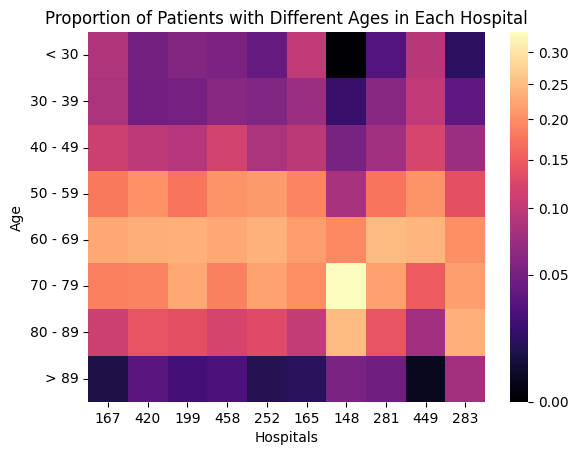

In [89]:
import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm
import seaborn as sns

age_labels = eicu.iloc[:, -8:].columns
age_heatmap = np.zeros(shape=(len(age_labels), len(selected_hospitals)))

hospital_labels = []
for idx, hospital_id in enumerate(selected_hospitals):

    hospital_data = eicu[eicu["hospitalid"] == hospital_id]
    age_data = (hospital_data.iloc[:, -8:]).to_numpy()
    total_patients = hospital_data.shape[0]
    total_age_patients = np.sum(age_data, axis=0)
    age_proportions = total_age_patients / total_patients
    age_heatmap[:, idx] = age_proportions

    hospital_labels.append(int(hospital_id))

plt.title("Proportion of Patients with Different Ages in Each Hospital")
ax = sns.heatmap(age_heatmap, cmap="magma", norm=PowerNorm(gamma=0.5))
ax.set_yticklabels(age_labels, rotation=0)
ax.set_xticklabels(hospital_labels)
plt.xlabel("Hospitals")
plt.ylabel("Age")
plt.show()

## Gender

'race_african', 'race_hispanic', 'race_caucasion', 'race_asian', 'race_native'

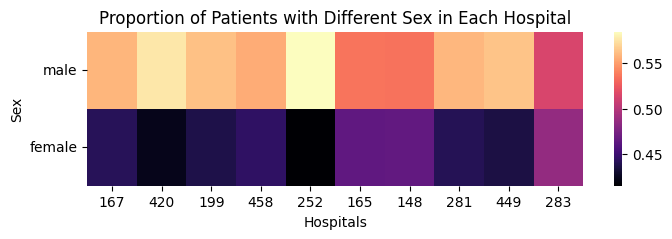

In [90]:
import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm
import seaborn as sns

sex_labels = ['male', 'female']
sex_heatmap = np.zeros(shape=(len(sex_labels), len(selected_hospitals)))

hospital_labels = []
for idx, hospital_id in enumerate(selected_hospitals):

    hospital_data = eicu[eicu["hospitalid"] == hospital_id]
    sex_data = (hospital_data.iloc[:, 196:198]).to_numpy()
    total_patients = hospital_data.shape[0]
    total_sex_patients = np.sum(sex_data, axis=0)
    sex_proportions = total_sex_patients / total_patients
    sex_heatmap[:, idx] = sex_proportions

    hospital_labels.append(int(hospital_id))

plt.figure(figsize=(8, 2))
plt.title("Proportion of Patients with Different Sex in Each Hospital")
ax = sns.heatmap(sex_heatmap, cmap="magma")
ax.set_yticklabels(sex_labels, rotation=0)
ax.set_xticklabels(hospital_labels)
plt.xlabel("Hospitals")
plt.ylabel("Sex")
plt.show()

## BMI

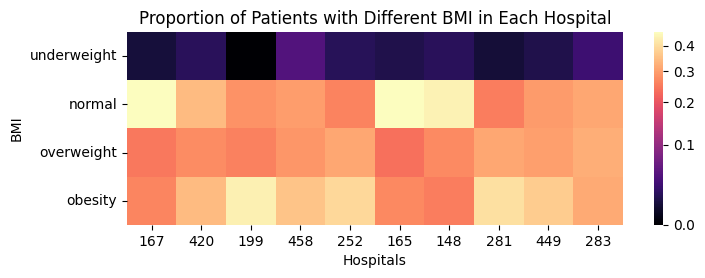

In [91]:
import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm
import seaborn as sns

bmi_labels = ["underweight", "normal", "overweight", "obesity"]
bmi_heatmap = np.zeros(shape=(len(bmi_labels), len(selected_hospitals)))
bmi_count = []

hospital_labels = []
for idx, hospital_id in enumerate(selected_hospitals):

    hospital_data = eicu[eicu["hospitalid"] == hospital_id]
    bmi_data = (hospital_data.iloc[:, 187:191]).to_numpy()
    total_patients = hospital_data.shape[0]
    total_bmi_patients = np.sum(bmi_data, axis=0)
    bmi_proportions = total_bmi_patients / total_patients
    bmi_heatmap[:, idx] = bmi_proportions
    bmi_count.append(total_bmi_patients.tolist())

    hospital_labels.append(int(hospital_id))

plt.figure(figsize=(8, 2.5))
plt.title("Proportion of Patients with Different BMI in Each Hospital")
ax = sns.heatmap(bmi_heatmap, cmap="magma", norm=PowerNorm(gamma=0.5))
ax.set_yticklabels(bmi_labels, rotation=0)
ax.set_xticklabels(hospital_labels)
plt.xlabel("Hospitals")
plt.ylabel("BMI")
plt.show()

# Race

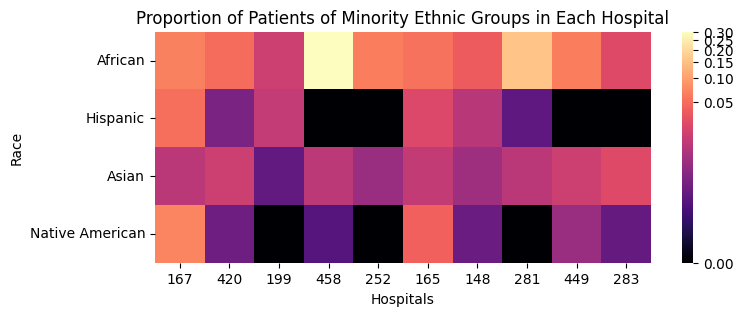

In [94]:
import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm
import seaborn as sns

race_labels = ['African', 'Hispanic', 'Asian', 'Native American']
race_heatmap = np.zeros(shape=(len(race_labels), len(selected_hospitals)))

hospital_labels = []
for idx, hospital_id in enumerate(selected_hospitals):

    hospital_data = eicu[eicu["hospitalid"] == hospital_id]
    race_data = (hospital_data.iloc[:, [191, 192, 194, 195]]).to_numpy()
    total_patients = hospital_data.shape[0]
    total_race_patients = np.sum(race_data, axis=0)
    race_proportions = total_race_patients / total_patients
    race_heatmap[:, idx] = race_proportions

    hospital_labels.append(int(hospital_id))

plt.figure(figsize=(8, 3))
plt.title("Proportion of Patients of Minority Ethnic Groups in Each Hospital")
ax = sns.heatmap(race_heatmap, cmap="magma", norm=PowerNorm(gamma=0.2))
ax.set_yticklabels(race_labels, rotation=0)
ax.set_xticklabels(hospital_labels)
plt.xlabel("Hospitals")
plt.ylabel("Race")
plt.show()

# Calculate Chi-Squared Test

In [22]:
eicu

,patientunitstayid,hospitalid,death,ventilation,sepsis,acetamin,biotene,compazine,ferrous,imdur,...,sex_is_male,sex_is_female,< 30,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79,80 - 89,> 89
0,141168.0,59.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,141178.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,141179.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,141194.0,73.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,141196.0,67.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138541,3353235.0,458.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
138542,3353237.0,458.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
138543,3353251.0,458.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
138544,3353254.0,459.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


[0.0, 9.307244307728706e-273, 0.0002953390430746778, 4.081049129407471e-154, 0.0]
[460.51701859880916, 460.51701859880916, 8.127386563004217, 353.19175022616105, 460.51701859880916]


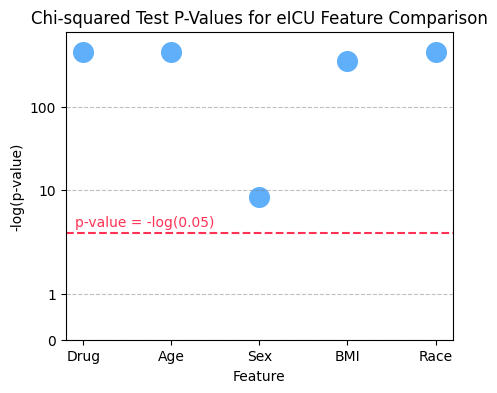

In [172]:
from scipy.stats import chi2_contingency
import matplotlib.ticker as ticker

total_feature_patients = np.zeros(shape=(len(selected_hospitals), len(eicu.columns)))

for idx, hospital_id in enumerate(selected_hospitals):

    hospital_data = eicu[eicu["hospitalid"] == hospital_id].to_numpy()
    total_patients = np.sum(hospital_data, axis=0)
    total_feature_patients[idx] = total_patients

_, drug_p_value, _, _ = chi2_contingency(total_feature_patients[:, 5:187])
_, age_p_value, _, _ = chi2_contingency(total_feature_patients[:, 198:206])
_, sex_p_value, _, _ = chi2_contingency(total_feature_patients[:, 196:198])
_, bmi_p_value, _, _ = chi2_contingency(total_feature_patients[:, 187:191])
_, race_p_value, _, _ = chi2_contingency(total_feature_patients[:, 191:196])

covariate_p_value_1 = [drug_p_value, age_p_value, sex_p_value, bmi_p_value, race_p_value]
print(covariate_p_value_1)

covariate_p_value = [-np.log(x+1e-200) for x in covariate_p_value_1]
print(covariate_p_value)

fig, ax = plt.subplots(figsize=(5, 4))
ax.set_title("Chi-squared Test P-Values for eICU Feature Comparison")
ax.scatter(np.arange(len(covariate_p_value)), covariate_p_value, color="#5faffa", s=200)
plt.axhline(y=-1 * np.log(0.05), color='#ff3255', linestyle='--', label='y = -log(0.05)')
plt.text(0.7, 3.6, 'p-value = -log(0.05)', color='#ff3255', ha='center')
ax.set_xticks(np.arange(len(covariate_p_value)), ["Drug", "Age", "Sex", "BMI", "Race"])
ax.set_ylabel("-log(p-value)")
ax.set_xlabel("Feature")
ax.set_yscale('symlog')
# y_ticks = [0, 10, 50, 150, 500]
# ax.set_yticks(y_ticks)
ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.grid(True, linestyle='--', which='both', color='grey', alpha=.5)
plt.ylim(0, 800)
plt.show()